In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

C:\Users\srikanth\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load dataset

In [3]:
big = pd.read_excel("BigMaxIndex.xlsx",sheet_name='BigMaxIndex')

In [4]:
big.head()

,Country,Big Mac Price in USD,Hourly Wages in USD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


In [5]:
X = big.iloc[:,1:2].values # independent
y= big.iloc[:,2:3].values # dependent

# Neural Network

# $ \hat y = a + b * x$

In [6]:
# I don't know values of a and b.
# Neural network will find the value of a and 
# b. such a way that SSE is minimum

In [7]:
# step-1: defining placeholder
x_input = tf.placeholder(dtype=tf.float32,
                        shape=None,name='in')
# step-2: variables
b = tf.Variable(initial_value=0,dtype=tf.float32)
a = tf.Variable(initial_value=0,dtype=tf.float32)

# step-3: Layer-1: matrix mulplication
L1 = tf.multiply(x_input,b,name='Layer1')

# step-4: output

output = tf.add(L1,a,name='ouput')

In [8]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter(logdir="./neural_reg",graph=sess.graph)
    writer.close()

# Backpropagation

In [9]:
# Training your neural network
y_actual = tf.placeholder(dtype=tf.float32,name='actual_values')

In [10]:
sse = tf.reduce_sum(tf.square(y_actual-output))

In [11]:
# optimizier
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [12]:
train = optimizer.minimize(sse)

# Look into your inputs
## Neural network always allows the values in 0 -1 range

### Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mx = MinMaxScaler()
my = MinMaxScaler()

In [19]:
x_norm = mx.fit_transform(X)
y_norm = my.fit_transform(y)

Text(336.971,0.5,'Hourly Wages USD')

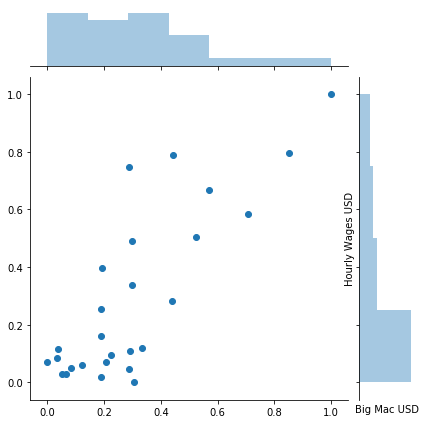

In [22]:
sns.jointplot(x_norm,y_norm)
plt.xlabel('Big Mac USD')
plt.ylabel('Hourly Wages USD')

# First neural network training

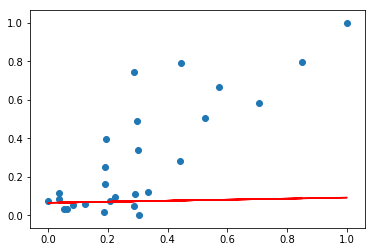

Epoch: 0, Loss: 3.52, slope: 0.03, intercept: 0.06


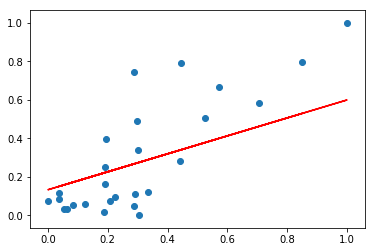

Epoch: 50, Loss: 1.20, slope: 0.47, intercept: 0.13


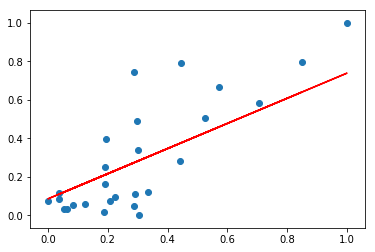

Epoch: 100, Loss: 0.94, slope: 0.65, intercept: 0.09


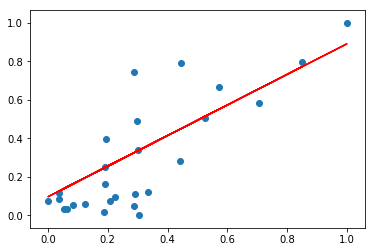

Epoch: 150, Loss: 0.88, slope: 0.80, intercept: 0.10


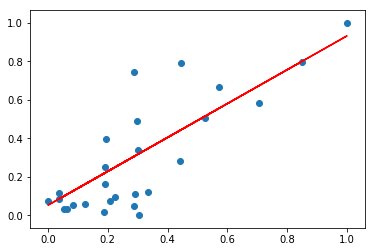

Epoch: 200, Loss: 0.81, slope: 0.88, intercept: 0.05


In [44]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter(logdir="./neural_net_reg",graph=sess.graph)
    epochs = 201
    batch_size = 10
    for i in range(epochs):
        ind = np.random.randint(0,27,size=batch_size)
        sess.run(train,feed_dict={x_input:x_norm[ind],y_actual:y_norm[ind]})
        if i % 50 == 0:
            # printing values
            loss =sess.run(sse,feed_dict={x_input:x_norm,y_actual:y_norm})
            slope = sess.run(b,feed_dict={x_input:x_norm,y_actual:y_norm})
            intercept = sess.run(a,feed_dict={x_input:x_norm,y_actual:y_norm})
            
            y_pred = intercept+ slope*x_norm
            plt.scatter(x_norm,y_norm)
            plt.plot(x_norm,y_pred,'r')
            plt.show()
            print('Epoch: %s, Loss: %0.2f, slope: %0.2f, intercept: %0.2f'%(i,loss,
                                                                        slope,intercept))
            
    writer.close()
            